In [29]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from numpy import random as rd
from igraph import Graph, ALL
import numpy as np

from util.graph_helper import GraphHelper
from agents.greedy import NaiveAgent, DSaturAgent
from agents.dummy_agent import DummyAgent
from environment import Environment
from system import System

rd.seed(0)
matplotlib.use("cairo")

# Check system performance

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f17eec6d908>)

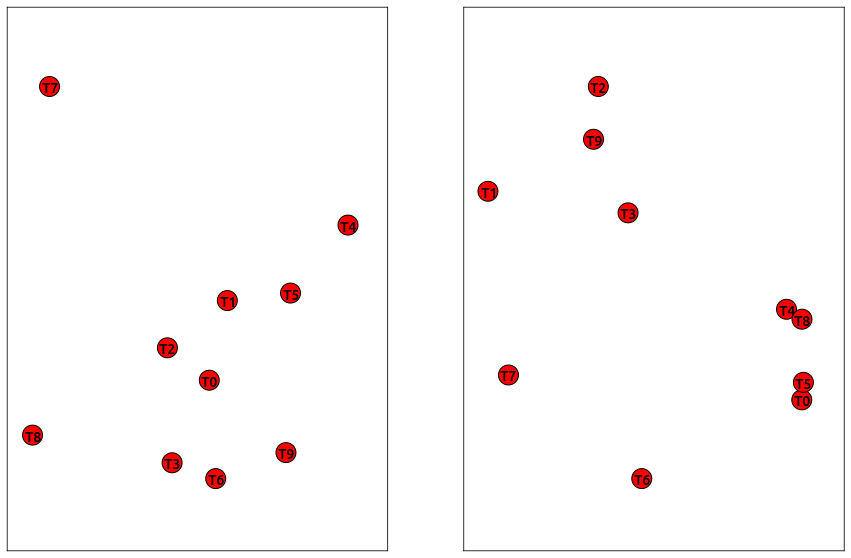

In [31]:
sys = System(antennas=10, seed=0)
data = sys.get_antennas()
dummy = DummyAgent(data)
g1 = dummy.get_graph()

sys = System(antennas=10, seed=1)
data = sys.get_antennas()
dummy = DummyAgent(data)
g2 = dummy.get_graph()


figsize=(15,10)
fig, axs = plt.subplots(1, 2, figsize=figsize)
GraphHelper.plot(g1, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(g2, figsize, fig=fig, ax=axs[1])

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f17ee849be0>)

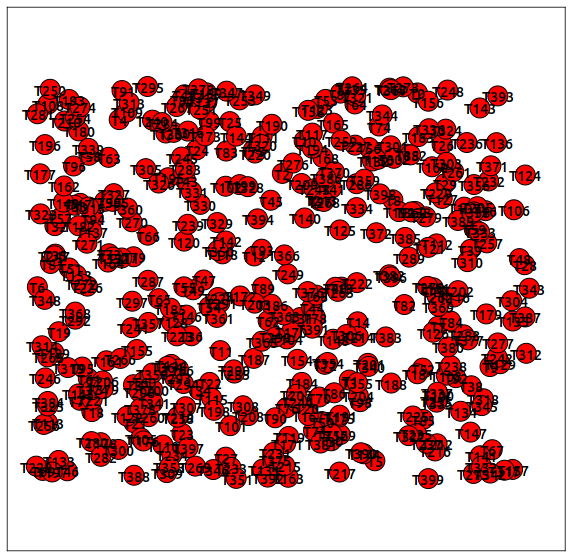

In [38]:
sys = System(antennas=400, seed=10)
data = sys.get_antennas()
dummy = DummyAgent(data)
g1 = dummy.get_graph()

GraphHelper.plot(g1, (10, 10))

# Check performance of agents

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


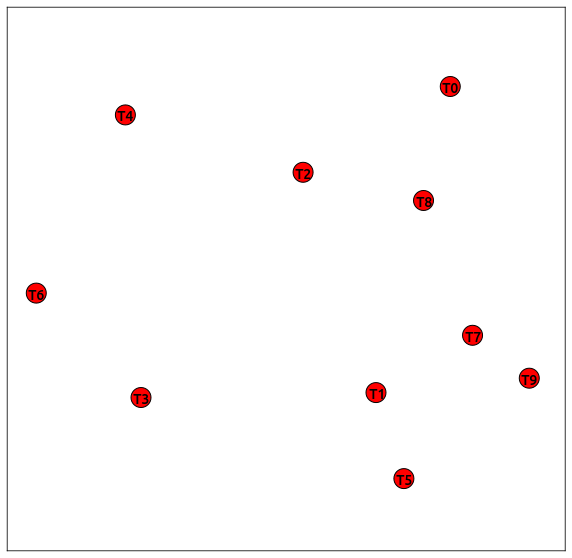

In [58]:
sys = System(antennas=10, seed=10)
data = sys.get_antennas()

naive = NaiveAgent(data)
dSatur = DSaturAgent(data)
dummy = DummyAgent(data)

g = dummy.get_graph()
fig, ax = GraphHelper.plot(g)

(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f17eeb805f8>)

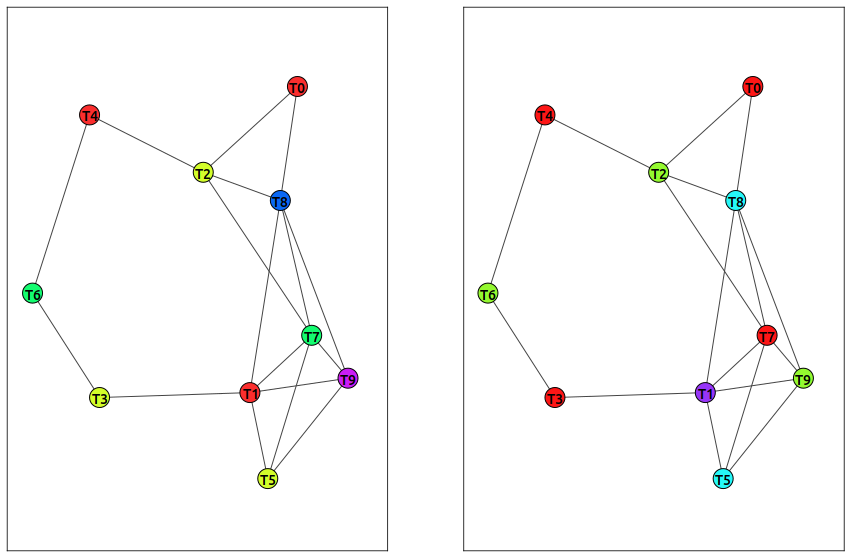

In [47]:
naive.solve()
dSatur.solve()
gn = naive.get_graph()
gd = dSatur.get_graph()

figsize=(15,10)
fig, axs = plt.subplots(1, 2, figsize=figsize)
GraphHelper.plot(gn, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(gd, figsize, fig=fig, ax=axs[1])

In [48]:
print("Frequencies in naive agent: {}\nFrequencies in dsatur agent: {}".format(
        naive.get_frequencies(), dSatur.get_frequencies()))

Frequencies in naive agent: 5
Frequencies in dsatur agent: 4


# Check Spectrum Analyzer

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


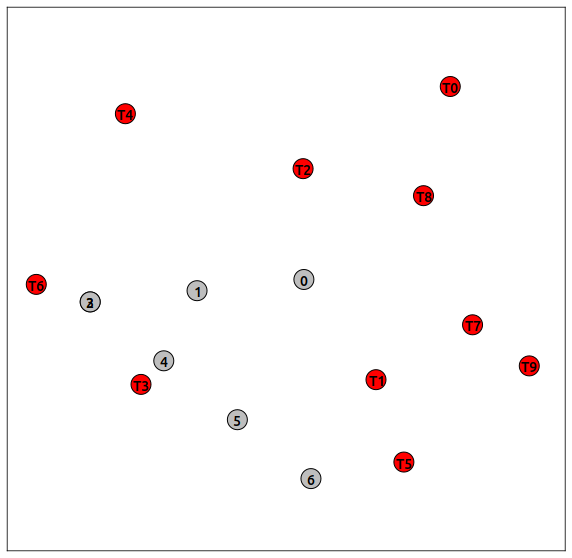

In [74]:
from spectrum_analyzer import SpectrumAnalyzer

sys = System(antennas=10, seed=10)
data = sys.get_antennas()

dummy = DummyAgent(data)
dummy.solve()
g = dummy.get_graph()
spec = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.5, 0.5))

for i in range(7):
    spec.record_signals(data)
    g.add_vertex(x=spec.position['x'], y=spec.position['y'], color='grey', label="{}".format(i))
    spec.move()

fig, ax = GraphHelper.plot(g)

In [75]:
from spectrum_analyzer import SpectrumAnalyzer
from igraph import plot

sys = System(antennas=10, seed=10)
data1 = sys.get_antennas()

sys = System(antennas=10, seed=10)
data2 = sys.get_antennas()

sys = System(antennas=10, seed=10)
data3 = sys.get_antennas()

dummy = DummyAgent(data1)
naive = NaiveAgent(data2)
dsatur = DSaturAgent(data3)
dummy.solve()
naive.solve()
dsatur.solve()

g1 = dummy.get_graph()
g2 = naive.get_graph()
g3 = dsatur.get_graph()

spec1 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec2 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec3 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


In [81]:
for i in range(50):
    spec1.record_signals(data1)
    spec2.record_signals(data2)
    spec3.record_signals(data3)
    g1.add_vertex(x=spec1.position['x'], y=spec1.position['y'], color='grey', label="{}".format(i))
    g2.add_vertex(x=spec2.position['x'], y=spec2.position['y'], color='grey', label="{}".format(i))
    g3.add_vertex(x=spec3.position['x'], y=spec3.position['y'], color='grey', label="{}".format(i))
    spec1.move()
    spec2.move()
    spec3.move()

(<Figure size 1080x504 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f17ee26fba8>)

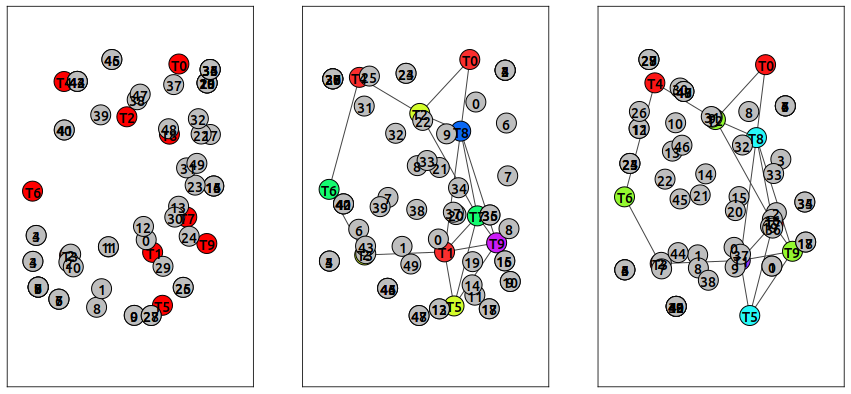

In [82]:
figsize=(15,7)
fig, axs = plt.subplots(1, 3, figsize=figsize)
GraphHelper.plot(g1, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(g2, figsize, fig=fig, ax=axs[1])
GraphHelper.plot(g3, figsize, fig=fig, ax=axs[2])

In [90]:
print("Frequencies in dummy agent: {}\nFrequencies in naive agent: {}\nFrequencies in dsatur agent: {}".format(
        dummy.get_frequencies(), naive.get_frequencies(), dsatur.get_frequencies()))

print("Overlapping in dummy agent: {}\nOverlapping in naive agent: {}\nOverlapping in dsatur agent: {}".format(
        spec1.get_overlapping(), spec2.get_overlapping(), spec3.get_overlapping()))

Frequencies in dummy agent: 1
Frequencies in naive agent: 5
Frequencies in dsatur agent: 4


,0
0,1
1,5
2,4


In [99]:
data = pd.DataFrame([[dummy.get_frequencies(), spec1.get_overlapping()], [naive.get_frequencies(), spec2.get_overlapping()], [dsatur.get_frequencies(), spec3.get_overlapping()]])
data.columns = ["Frequencies", "Overlapping"]
data.index = ["Dummy", "Naive", "DSatur"]
data

,Frequencies,Overlapping
Dummy,1,62
Naive,5,0
DSatur,4,0


# Log Distance Propagation Loss Model

In [11]:
from util.propagation_model import PropagationModel

In [12]:
data = [[GraphHelper.calc_distance({'x': 0, 'y': 0}, {'x': x, 'y': y}), PropagationModel.log(GraphHelper.calc_distance({'x': 0, 'y': 0}, {'x': x, 'y': y}), 50, 11e8, reference_distance=0.2)] for x in np.linspace(0, 1, 10) for y in np.linspace(0, 1, 10) ]

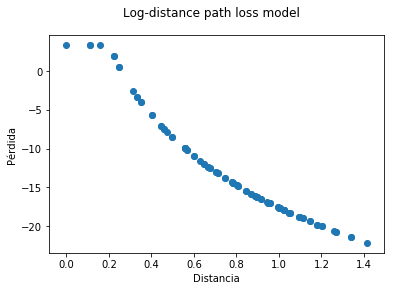

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
s = np.array(data)
plt.scatter(s[:,0], s[:,1])
plt.suptitle("Log-distance path loss model")
plt.xlabel("Distancia")
plt.ylabel("Pérdida")
plt.show()

# Check simulator performance

In [104]:
time = 10

for agent_type in ['naive', 'dummy', 'dsatur']:
    env = Environment.create(agent_type, limit_time=time, seed=1, verbose=False)
    env.start()
    # fig, ax = GraphHelper.plot(env.get_agent().get_graph())

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0.02957891388470384, 'y': 0.06245028534865106} 
{'x': 0.01967623319728814, 'y': 0.06384201635825172}
{0: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]} 0
[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]
{'x': 0.009773552509872436, 'y': 0.06523374736785238}
{0: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]} 0
[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]
Direction {'deg': 243, 'rad': 4.241150082346221}, position: {'x': 0.009773552509872436, 'y': 0.06523374736785238} 
{'x': 0.009773552509872436, 'y': 0.06523374736785238}
{0: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 1, 0,

In [105]:
df = pd.read_csv("data/data.csv", sep=";", names=["time", "agent", "graph", "frequencies", "total_freq", "overlap"])
df.tail()

,time,agent,graph,frequencies,total_freq,overlap
355,5,DSaturAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[1, 1, 0, 3, 4, 2, 3, 0, 5, 2]",6,0
356,6,DSaturAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[1, 1, 0, 3, 4, 2, 3, 0, 5, 2]",6,0
357,7,DSaturAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[1, 1, 0, 3, 4, 2, 3, 0, 5, 2]",6,0
358,8,DSaturAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[1, 1, 0, 3, 4, 2, 3, 0, 5, 2]",6,0
359,9,DSaturAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[1, 1, 0, 3, 4, 2, 3, 0, 5, 2]",6,0


In [107]:
df.groupby("agent").agg("overlap").mean()

agent
DSaturAgent      0.000
DummyAgent     136.925
NaiveAgent       0.000
Name: overlap, dtype: float64

# Show data

,time,agent,graph,frequencies,total_freq,overlap
0,0,NaiveAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]",7,0
1,1,NaiveAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]",7,0
2,2,NaiveAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]",7,0
3,3,NaiveAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]",7,0
4,4,NaiveAgent,"[[0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, ...","[0, 0, 1, 2, 3, 1, 2, 4, 5, 6]",7,0


# Load nodes from file

In [17]:
data = pd.read_csv('data/antennas.csv')
data.head()

,x,y,name,short
0,0.548814,0.715189,Tower 0,T0
1,0.602763,0.544883,Tower 1,T1
2,0.423655,0.645894,Tower 2,T2
3,0.437587,0.891773,Tower 3,T3
4,0.963663,0.383442,Tower 4,T4


Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


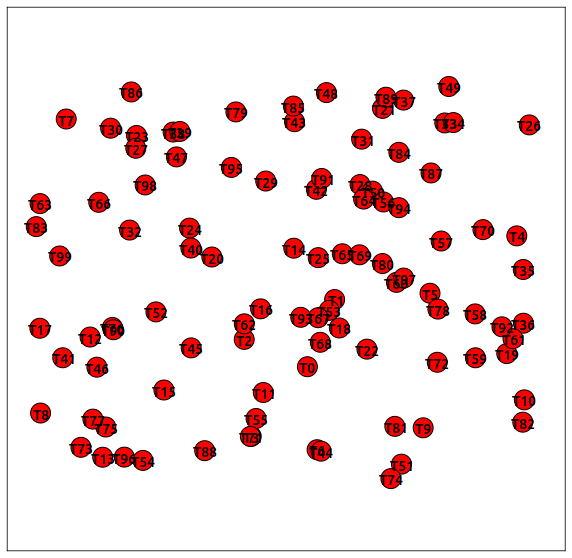

In [18]:
sys = System(csv_file="data/antennas.csv")
data = sys.get_antennas()
dummy = DummyAgent(data)

g = dummy.get_graph()
fig, ax = GraphHelper.plot(g)